<a href="https://colab.research.google.com/github/Denis04-M/news_group_topics/blob/main/news_groups_topics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

['00' '000' '0d' '0t' '10' '100' '11' '12' '13' '14' '145' '15' '16' '17'
 '18' '19' '1993' '1d9' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29'
 '30' '31' '32' '33' '34' '34u' '35' '40' '45' '50' '55' '80' '92' '93'
 '__' '___' 'a86' 'able' 'ac' 'access' 'actually' 'address' 'ago' 'agree'
 'al' 'american' 'andrew' 'answer' 'anybody' 'apple' 'application' 'apr'
 'april' 'area' 'argument' 'armenian' 'armenians' 'article' 'ask' 'asked'
 'att' 'au' 'available' 'away' 'ax' 'b8f' 'bad' 'based' 'believe'
 'berkeley' 'best' 'better' 'bible' 'big' 'bike' 'bit' 'black' 'board'
 'body' 'book' 'box' 'buy' 'ca' 'california' 'called' 'came' 'canada'
 'car' 'card' 'care' 'case' 'cause' 'cc' 'center' 'certain' 'certainly'
 'change' 'check' 'children' 'chip' 'christ' 'christian' 'christians'
 'church' 'city' 'claim' 'clinton' 'clipper' 'cmu' 'code' 'college'
 'color' 'colorado' 'columbia' 'com' 'come' 'comes' 'company' 'computer'
 'consider' 'contact' 'control' 'copy' 'correct' 'cost' 'country' 'co

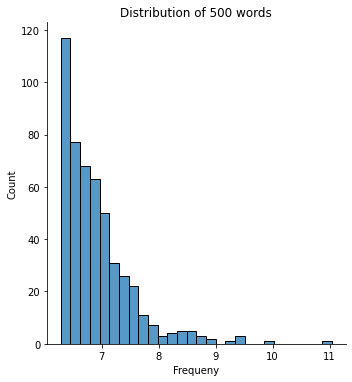

In [41]:
from sklearn.datasets import fetch_20newsgroups
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from nltk.stem import WordNetLemmatizer
from nltk.corpus import names

topics = fetch_20newsgroups()
cv = CountVectorizer(stop_words = 'english', max_features= 500)
transformed = cv.fit_transform(topics.data)
print(cv.get_feature_names_out())

# plotting the distribution of words
sns.displot(np.log(transformed.toarray().sum(axis=0)))
plt.xlabel('Log Count')
plt.xlabel('Frequeny')
plt.title('Distribution of 500 words')
plt.show()

In [37]:
# data processing

# import nltk
# nltk.download('wordnet')

def letters_only(astr):
  return astr.isalpha()

all_names = set(names.words())
lemmatizer = WordNetLemmatizer()
cleaned = []

for topic in topics.data:
  cleaned.append(' '.join([lemmatizer.lemmatize(word.lower())
  for word in topic.split()
  if letters_only(word) #calling function to remove number and special char
  and word not in all_names])) # removing names

transformed = cv.fit_transform(cleaned)
print(cv.get_feature_names())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
['able', 'accept', 'access', 'according', 'act', 'action', 'actually', 'add', 'address', 'ago', 'agree', 'algorithm', 'allow', 'american', 'anonymous', 'answer', 'anybody', 'apple', 'application', 'apr', 'arab', 'area', 'argument', 'armenian', 'article', 'ask', 'asked', 'assume', 'atheist', 'attack', 'attempt', 'available', 'away', 'bad', 'based', 'basic', 'belief', 'believe', 'best', 'better', 'bible', 'big', 'bike', 'bit', 'black', 'board', 'body', 'book', 'box', 'build', 'bus', 'business', 'buy', 'ca', 'california', 'called', 'came', 'car', 'card', 'care', 'carry', 'case', 'cause', 'center', 'certain', 'certainly', 'chance', 'change', 'check', 'child', 'chip', 'christian', 'church', 'city', 'claim', 'clear', 'clipper', 'code', 'college', 'color', 'come', 'coming', 'command', 'comment', 'common', 'communication', 'company', 'computer', 'computing', 'consider', 'considere

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


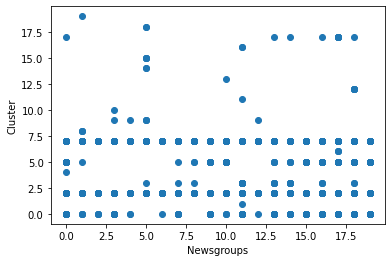

In [38]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters= 20)
km.fit(transformed)
labels = topics.target

plt.scatter(labels, km.labels_)
plt.xlabel("Newsgroups")
plt.ylabel('Cluster')
plt.show()

In [43]:
from sklearn.decomposition import NMF

nmf = NMF(n_components = 100, random_state=43).fit(transformed)
for topic_idx, topic in enumerate(nmf.components_):
  label = f'{topic_idx} :'
  print(label, " ".join([cv.get_feature_names()[i]
                         for i in topic.argsort() [:-9:-1]]))

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


0 : ax max pl b8f 45 14 mr au
1 : a86 b8f 1d9 ax 145 34u g9v 0t
2 : available edu version mit pub based ftp sun
3 : db cs al bit data left place right
4 : g9v b8f a86 1d9 ax 145 0d mr
5 : 14 16 10 12 13 15 11 20
6 : didn know came went did started saw took
7 : file gun control states mr house 1993 code
8 : 0d 145 a86 0t 45 34u 34 b8f
9 : edu john david mit au andrew cmu uiuc
10 : mr president going know said did groups package
11 : bit 32 mac ibm 93 16 92 color
12 : 00 20 15 won 30 san american berkeley
13 : internet email information mail address user access network
14 : hockey team season games division 92 st players
15 : output file program line open write read info
16 : god bible christ hell life man world faith
17 : 55 28 45 35 21 32 30 40
18 : list day information send faq open look mail
19 : 25 35 34 32 33 31 29 team
20 : image software user include display sun set using
21 : space earth nasa technology national program small news
22 : 1d9 pl 34u b8f 0t g9v 34 st
23 : use used u